In [1]:
'''
Build a suggorate model for the data
there are 2 ML models that want to build
if there are 3 dataset, then there are 6 models after training
'''

'\nBuild a suggorate model for the data\nthere are 2 ML models that want to build\nif there are 3 dataset, then there are 6 models after training\n'

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import seaborn as sns
import sklearn
import imblearn
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as m
import xgboost as xgb
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#draw figure of train test split distribution
def draw_distribution(train, val, test, title):
    train_distribution_lr_predicted = train.value_counts(title)
    train_distribution_lr_predicted = train_distribution_lr_predicted.reset_index()
    train_distribution_lr_predicted["class"] = "train"

    val_distribution_lr_predicted = val.value_counts(title)
    val_distribution_lr_predicted = val_distribution_lr_predicted.reset_index()
    val_distribution_lr_predicted["class"] = "validation"

    test_distribution_lr_predicted = test.value_counts(title)
    test_distribution_lr_predicted = test_distribution_lr_predicted.reset_index()
    test_distribution_lr_predicted["class"] = "test"

    total_distribution_lr_predicted = pd.concat([train_distribution_lr_predicted, val_distribution_lr_predicted, test_distribution_lr_predicted])

    total_distribution_lr_predicted.columns = [title, "Count", "class"]
    grade_map = {
        0: "Benign",
        1: "Malicious"}
    total_distribution_lr_predicted["Label"] = total_distribution_lr_predicted[title].map(grade_map)

    ax = sns.barplot(x="class", y="Count", hue=title, data=total_distribution_lr_predicted, palette="Blues" )
    ax.bar_label(ax.containers[0], label_type='edge')
    ax.bar_label(ax.containers[1], label_type='edge')

In [4]:
train_lr_predicted = pd.read_csv('../surrogate_model/data_for_training/0322/df_lr_predicted_0322.csv')
test_lr_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/test_CICIDS2017.csv')

train_dt_predicted = pd.read_csv('../surrogate_model/data_for_training/0322/df_dt_predicted_0322.csv')
test_dt_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/test_CICIDS2017.csv')

train_xgb_predicted = pd.read_csv('../surrogate_model/data_for_training/0322/df_xgb_predicted_0322.csv')
test_xgb_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/test_CICIDS2017.csv')

train_dnn_predicted = pd.read_csv('../surrogate_model/data_for_training/0322/df_dnn_predicted_0322.csv')
test_dnn_predicted = pd.read_csv('../datasets/surrogate_model/CICIDS2017/split_dataset/test_CICIDS2017.csv')


X_train_lr_predicted, y_train_lr_predicted = train_lr_predicted.drop(columns=['LR_Predicted', 'Label'], axis=1), train_lr_predicted['LR_Predicted']
y_train_lr_predicted.columns = ['Label']
# X_val_lr_predicted, y_val_lr_predicted = val_lr_predicted.drop(columns=['LR_Predicted'], axis=1), val_lr_predicted['LR_Predicted']
X_test_lr_predicted, y_test_lr_predicted = test_lr_predicted.drop(columns=['Label'], axis=1), test_lr_predicted['Label']

X_train_dt_predicted, y_train_dt_predicted = train_dt_predicted.drop(columns=['DT_Predicted', 'Label'], axis=1), train_dt_predicted['DT_Predicted']
y_train_dt_predicted.columns = ['Label']
# X_val_dt_predicted, y_val_dt_predicted = val_dt_predicted.drop(columns=['DT_Predicted'], axis=1), val_dt_predicted['DT_Predicted']
X_test_dt_predicted, y_test_dt_predicted = test_dt_predicted.drop(columns=['Label'], axis=1), test_dt_predicted['Label']

X_train_xgb_predicted, y_train_xgb_predicted = train_xgb_predicted.drop(columns=['XGB_Predicted', 'Label'], axis=1), train_xgb_predicted['XGB_Predicted']
y_train_xgb_predicted.columns = ['Label']
# X_val_xgb_predicted, y_val_xgb_predicted = val_xgb_predicted.drop(columns=['XGB_Predicted'], axis=1), val_xgb_predicted['XGB_Predicted']    
X_test_xgb_predicted, y_test_xgb_predicted = test_xgb_predicted.drop(columns=['Label'], axis=1), test_xgb_predicted['Label']

X_train_dnn_predicted, y_train_dnn_predicted = train_dnn_predicted.drop(columns=['DNN_Predicted', 'Label'], axis=1), train_dnn_predicted['DNN_Predicted']
y_train_dnn_predicted.columns = ['Label']
# X_val_dnn_predicted, y_val_dnn_predicted = val_dnn_predicted.drop(columns=['DNN_Predicted'], axis=1), val_dnn_predicted['DNN_Predicted']
X_test_dnn_predicted, y_test_dnn_predicted = test_dnn_predicted.drop(columns=['Label'], axis=1), test_dnn_predicted['Label']

# X_train_lr_predicted, y_train_lr_predicted  = Preprocess_GAN(train_lr_predicted, "LR_Predicted")
# X_val_lr_predicted, y_val_lr_predicted = Preprocess_GAN(val_lr_predicted, "LR_Predicted")
# X_test_lr_predicted, y_test_lr_predicted = Preprocess_GAN(test_lr_predicted, "LR_Predicted")

# X_train_dt_predicted, y_train_dt_predicted = Preprocess_GAN(train_dt_predicted, "DT_Predicted")
# X_val_dt_predicted, y_val_dt_predicted = Preprocess_GAN(val_dt_predicted, "DT_Predicted")
# X_test_dt_predicted, y_test_dt_predicted = Preprocess_GAN(test_dt_predicted, "DT_Predicted")

# X_train_xgb_predicted, y_train_xgb_predicted = Preprocess_GAN(train_xgb_predicted, "XGB_Predicted")
# X_val_xgb_predicted, y_val_xgb_predicted = Preprocess_GAN(val_xgb_predicted, "XGB_Predicted")
# X_test_xgb_predicted, y_test_xgb_predicted = Preprocess_GAN(test_xgb_predicted, "XGB_Predicted")

# X_train_dnn_predicted, y_train_dnn_predicted = Preprocess_GAN(train_dnn_predicted, "DNN_Predicted")
# X_val_dnn_predicted, y_val_dnn_predicted = Preprocess_GAN(val_dnn_predicted, "DNN_Predicted")
# X_test_dnn_predicted, y_test_dnn_predicted = Preprocess_GAN(test_dnn_predicted, "DNN_Predicted")


In [5]:
#draw distribution
#logistic regression
#draw_distribution(train_lr_predicted, val_lr_predicted, test_lr_predicted, 'LR_Predicted')

#decision tree
# draw_distribution(train_dt_predicted, val_dt_predicted, test_dt_predicted, 'DT_Predicted')

#sgboost
# draw_distribution(train_xgb_predicted, val_xgb_predicted, test_xgb_predicted, 'XGB_Predicted')

## dnn
# draw_distribution(train_dnn_predicted, val_dnn_predicted, test_dnn_predicted, 'DNN_Predicted')

In [6]:
# buile model
# retuen model, y_pred
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
import xgboost as xgb
from xgboost import XGBClassifier

def model_train(modelname, X_train_predicted, y_train_predicted, X_test_predicted, y_test_predicted, dataset_resource):

    if modelname == 'LogisticRegression':
        model = LogisticRegression()
        model.fit(X_train_predicted, y_train_predicted)
    elif modelname == 'DecisionTree':
        model = DecisionTreeClassifier()
        model.fit(X_train_predicted, y_train_predicted)
    elif modelname == 'XGBoost':
        model = xgb.XGBClassifier()
        model.fit(X_train_predicted, y_train_predicted)
        
    # print(X_train_predicted.shape, X_test_predicted.shape)    
    print(modelname)
    print("dataset_resource: ", dataset_resource)
    # Testing
    start_test = time.time()
    y_pred = model.predict(X_test_predicted)
    acc_test = accuracy_score(y_test_predicted, y_pred)
    recall_score_test = recall_score(y_test_predicted, y_pred, average='weighted')
    end_test = time.time()
    testing_time = end_test - start_test


    # Validation
    start_validation = time.time()
    y_test =  model.predict(X_test_predicted)
    val_acc = accuracy_score(y_test_predicted, y_test)
    recall_score_test = recall_score(y_test_predicted, y_test, average='weighted')
    end_validation = time.time()
    validation_time = end_validation - start_validation

    # Results
    print("Accuracy: ", acc_test)
    print("Recall: ", recall_score_test)
    print("Validation Accuracy: ", val_acc)
    print("Validation Recall: ", recall_score_test)
    print("Confusion matrix: \n", confusion_matrix(y_test_predicted, y_pred))
    print("Classification report: \n\n", classification_report(y_test_predicted, y_pred, target_names=['Benign', 'Malicious'], digits=4))
    return model, y_pred

In [7]:
# draw confusion matrix

def draw_confusion_matrix(y_test, y_pred, model, model_name, dataset_resource):
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    total = np.sum(cm)
    confusion_percentage = (cm  / total) * 100

    strings = np.asarray([['%', '%'],
                        ['%', '%']])
    labels = (np.asarray(["{1:.2f} %".format(string, confusion_percentage) for string, confusion_percentage in zip(strings.flatten(), confusion_percentage.flatten())])).reshape(2, 2)
    plt.figure(figsize=(8,5))
    sns.heatmap(confusion_percentage, annot=labels, fmt='', cmap=plt.cm.Blues, linewidths=1, xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'], annot_kws={"size": 10})
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.title(f'Confusion Matrix of {model_name} Surrogate Model', fontsize=15)
    # add accuracy
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    plt.text(0.5, 2.5, f'Dataset from: {dataset_resource}', dict(size=12))
    
    plt.show()

### Logostic Regression

In [8]:

lr_model_from_lrdata, y_lrpred_from_lrdata = model_train('LogisticRegression', X_train_lr_predicted, y_train_lr_predicted, X_test_lr_predicted, y_test_lr_predicted, 'lr')
lr_model_from_dtdata, y_lrpred_from_dtdata = model_train('LogisticRegression', X_train_dt_predicted, y_train_dt_predicted, X_test_dt_predicted, y_test_dt_predicted, 'dt')
lr_model_from_xgbdata, y_lrpred_from_xgbdata = model_train('LogisticRegression', X_train_xgb_predicted, y_train_xgb_predicted, X_test_xgb_predicted, y_test_xgb_predicted, 'xgb')
lr_model_from_dnndata, y_lrpred_from_dnndata = model_train('LogisticRegression', X_train_dnn_predicted, y_train_dnn_predicted, X_test_dnn_predicted, y_test_dnn_predicted, 'dnn')



LogisticRegression
dataset_resource:  lr
Accuracy:  0.8257874015748031
Recall:  0.8257874015748031
Validation Accuracy:  0.8257874015748031
Validation Recall:  0.8257874015748031
Confusion matrix: 
 [[11101  1470]
 [ 1539  3162]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.8782    0.8831    0.8806     12571
   Malicious     0.6826    0.6726    0.6776      4701

    accuracy                         0.8258     17272
   macro avg     0.7804    0.7778    0.7791     17272
weighted avg     0.8250    0.8258    0.8254     17272

LogisticRegression
dataset_resource:  dt
Accuracy:  0.8267137563686892
Recall:  0.8267137563686892
Validation Accuracy:  0.8267137563686892
Validation Recall:  0.8267137563686892
Confusion matrix: 
 [[12005   566]
 [ 2427  2274]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.8318    0.9550    0.8892     12571
   Malicious     0.8007    0.4837    0.6031      470

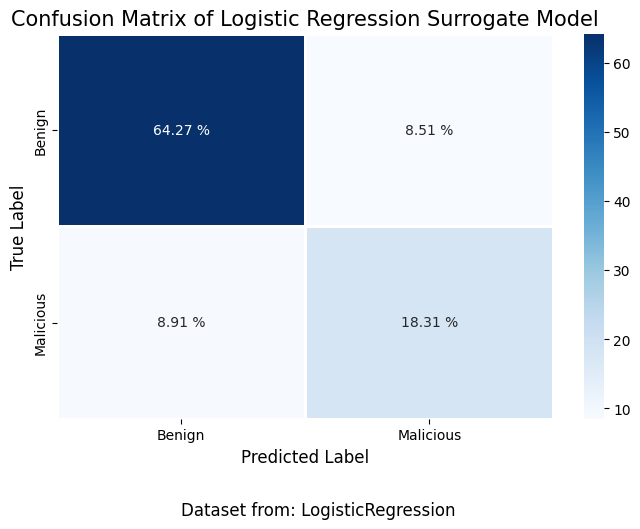

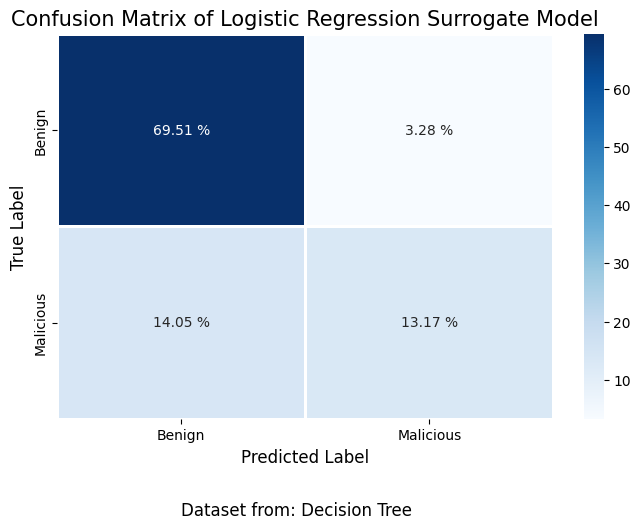

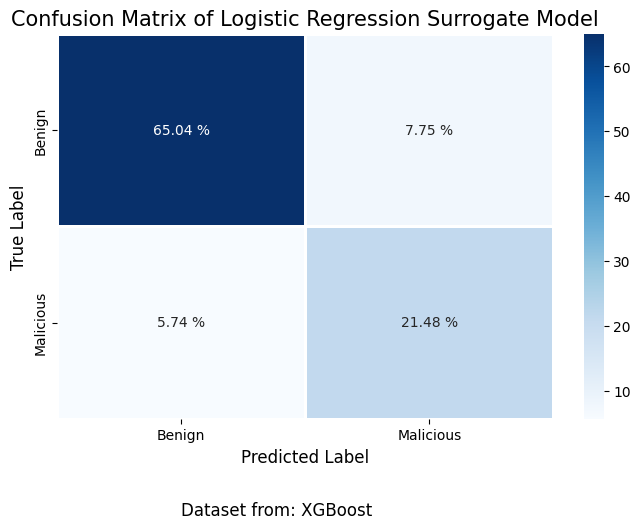

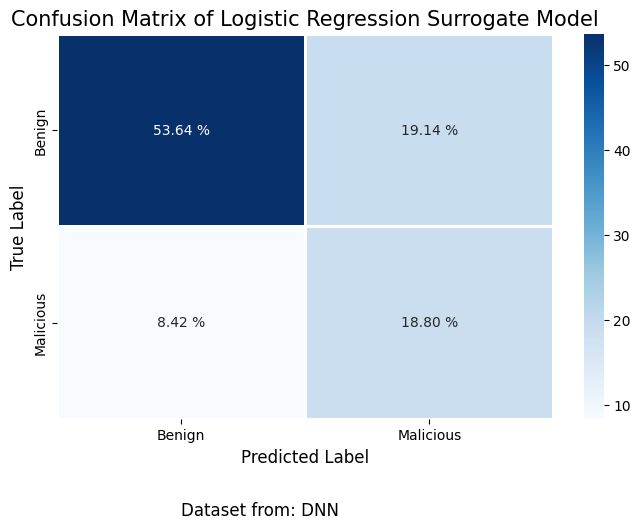

In [9]:

draw_confusion_matrix(y_test_lr_predicted, y_lrpred_from_lrdata, lr_model_from_lrdata, 'Logistic Regression', "LogisticRegression")
draw_confusion_matrix(y_test_dt_predicted, y_lrpred_from_dtdata, lr_model_from_dtdata, 'Logistic Regression', "Decision Tree")
draw_confusion_matrix(y_test_xgb_predicted, y_lrpred_from_xgbdata, lr_model_from_xgbdata, 'Logistic Regression', "XGBoost")
draw_confusion_matrix(y_test_dnn_predicted, y_lrpred_from_dnndata, lr_model_from_dnndata, 'Logistic Regression', "DNN")

### DecisionTree

In [10]:
dt_model_from_lrdata, y_dtpred_from_lrdata = model_train('DecisionTree', X_train_lr_predicted, y_train_lr_predicted, X_test_lr_predicted, y_test_lr_predicted, 'lr')
dt_model_from_dtdata, y_dtpred_from_dtdata = model_train('DecisionTree', X_train_dt_predicted, y_train_dt_predicted, X_test_dt_predicted, y_test_dt_predicted, 'dt')
dt_model_from_xgbdata, y_dtpred_from_xgbdata = model_train('DecisionTree', X_train_xgb_predicted, y_train_xgb_predicted, X_test_xgb_predicted, y_test_xgb_predicted, 'xgb')
dt_model_from_dnndata, y_dtpred_from_dnndata = model_train('DecisionTree', X_train_dnn_predicted, y_train_dnn_predicted, X_test_dnn_predicted, y_test_dnn_predicted, 'dnn')

DecisionTree
dataset_resource:  lr
Accuracy:  0.8316350162112089
Recall:  0.8316350162112089
Validation Accuracy:  0.8316350162112089
Validation Recall:  0.8316350162112089
Confusion matrix: 
 [[11212  1359]
 [ 1549  3152]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.8786    0.8919    0.8852     12571
   Malicious     0.6987    0.6705    0.6843      4701

    accuracy                         0.8316     17272
   macro avg     0.7887    0.7812    0.7848     17272
weighted avg     0.8297    0.8316    0.8305     17272

DecisionTree
dataset_resource:  dt
Accuracy:  0.896943029180176
Recall:  0.896943029180176
Validation Accuracy:  0.896943029180176
Validation Recall:  0.896943029180176
Confusion matrix: 
 [[12481    90]
 [ 1690  3011]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.8807    0.9928    0.9334     12571
   Malicious     0.9710    0.6405    0.7719      4701

    accuracy 

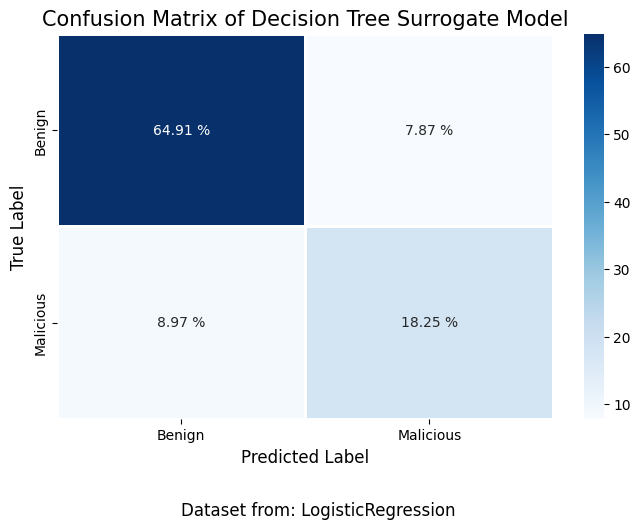

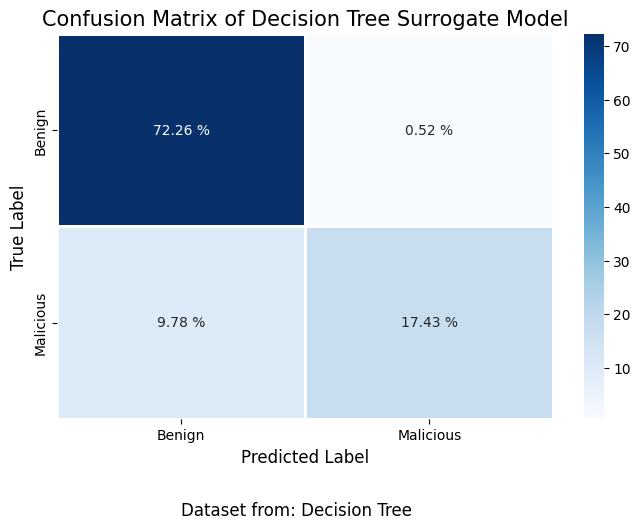

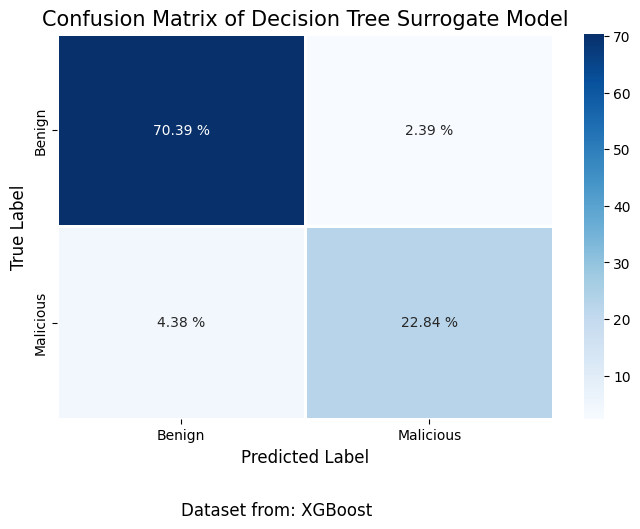

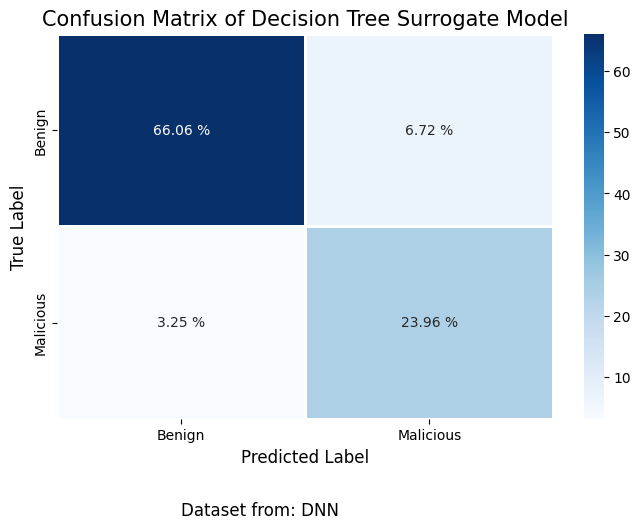

In [11]:
draw_confusion_matrix(y_test_lr_predicted, y_dtpred_from_lrdata, dt_model_from_lrdata, 'Decision Tree', "LogisticRegression")
draw_confusion_matrix(y_test_dt_predicted, y_dtpred_from_dtdata, dt_model_from_dtdata, 'Decision Tree', "Decision Tree")
draw_confusion_matrix(y_test_xgb_predicted, y_dtpred_from_xgbdata, dt_model_from_xgbdata, 'Decision Tree', "XGBoost")
draw_confusion_matrix(y_test_dnn_predicted, y_dtpred_from_dnndata, dt_model_from_dnndata, 'Decision Tree', "DNN")

### XGBoost

In [12]:
xgb_model_from_lrdata, y_xgbpred_from_lrdata = model_train('XGBoost', X_train_lr_predicted, y_train_lr_predicted, X_test_lr_predicted, y_test_lr_predicted, 'lr')
xgb_model_from_dtdata, y_xgbpred_from_dtdata = model_train('XGBoost', X_train_dt_predicted, y_train_dt_predicted, X_test_dt_predicted, y_test_dt_predicted, 'dt')
xgb_model_from_xgbdata, y_xgbpred_from_xgbdata = model_train('XGBoost', X_train_xgb_predicted, y_train_xgb_predicted, X_test_xgb_predicted, y_test_xgb_predicted, 'xgb')
xgb_model_from_dnndata, y_xgbpred_from_dnndata = model_train('XGBoost', X_train_dnn_predicted, y_train_dnn_predicted, X_test_dnn_predicted, y_test_dnn_predicted, 'dnn')


XGBoost
dataset_resource:  lr
Accuracy:  0.8319245020842982
Recall:  0.8319245020842982
Validation Accuracy:  0.8319245020842982
Validation Recall:  0.8319245020842982
Confusion matrix: 
 [[11217  1354]
 [ 1549  3152]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.8787    0.8923    0.8854     12571
   Malicious     0.6995    0.6705    0.6847      4701

    accuracy                         0.8319     17272
   macro avg     0.7891    0.7814    0.7851     17272
weighted avg     0.8299    0.8319    0.8308     17272

XGBoost
dataset_resource:  dt
Accuracy:  0.8979272811486799
Recall:  0.8979272811486799
Validation Accuracy:  0.8979272811486799
Validation Recall:  0.8979272811486799
Confusion matrix: 
 [[12485    86]
 [ 1677  3024]]
Classification report: 

               precision    recall  f1-score   support

      Benign     0.8816    0.9932    0.9341     12571
   Malicious     0.9723    0.6433    0.7743      4701

    accuracy       

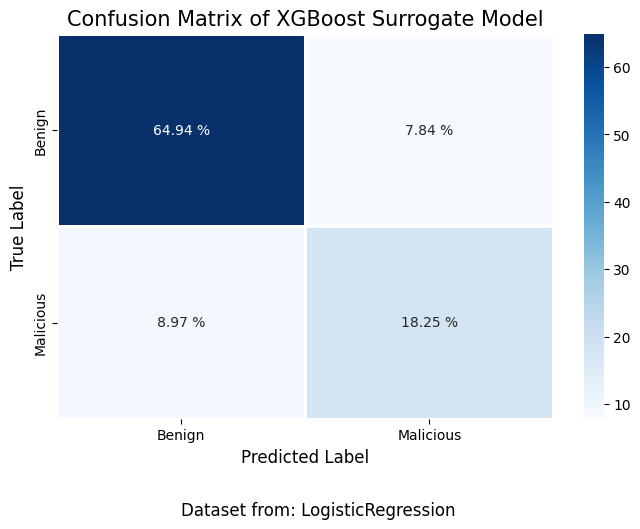

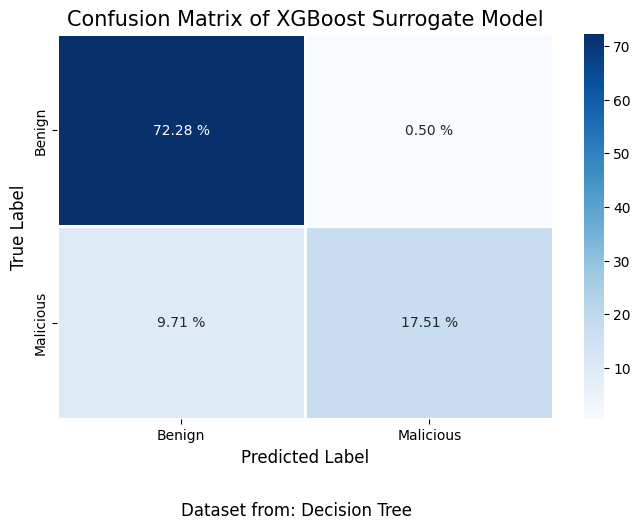

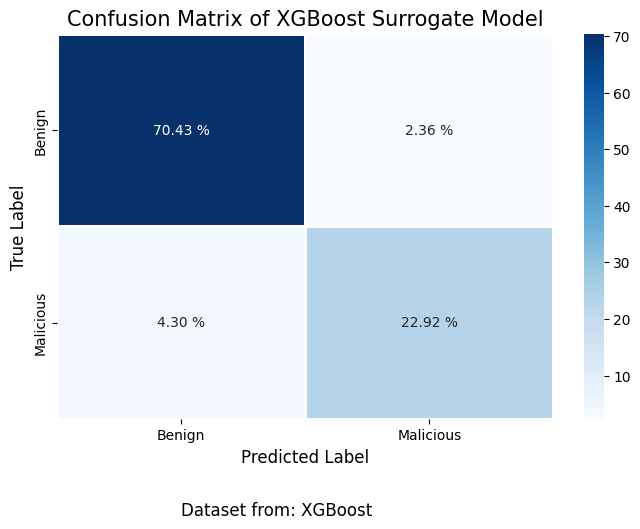

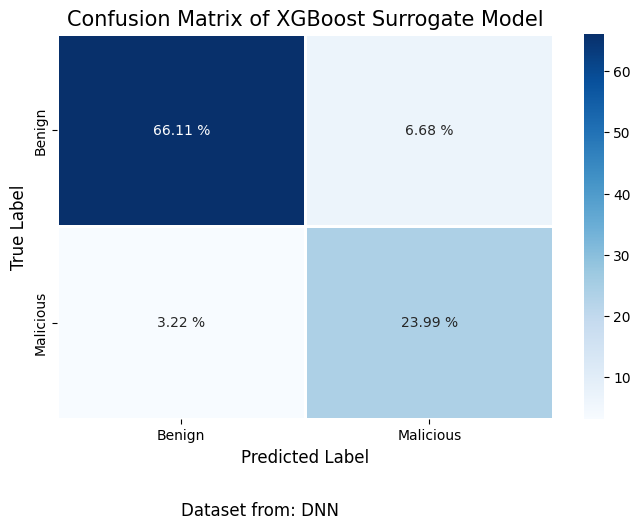

In [13]:
draw_confusion_matrix(y_test_lr_predicted, y_xgbpred_from_lrdata, xgb_model_from_lrdata, 'XGBoost', "LogisticRegression")
draw_confusion_matrix(y_test_dt_predicted, y_xgbpred_from_dtdata, xgb_model_from_dtdata, 'XGBoost', "Decision Tree")
draw_confusion_matrix(y_test_xgb_predicted, y_xgbpred_from_xgbdata, xgb_model_from_xgbdata, 'XGBoost', "XGBoost")
draw_confusion_matrix(y_test_dnn_predicted, y_xgbpred_from_dnndata, xgb_model_from_dnndata, 'XGBoost', "DNN")

### Save Model

In [14]:
import torch
import pickle

# save model
# pickle.dump(model_dt, open("../target_model/ml_model/target_dt.pickle", "wb")) # target_model\ml_model
# pickle.dump(model_lr, open("../target_model/ml_model/target_lr.pickle", "wb"))

pickle.dump(lr_model_from_lrdata, open("../surrogate_model/ml_model/lr_model_from_lrdata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(lr_model_from_dtdata, open("../surrogate_model/ml_model/lr_model_from_dtdata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(lr_model_from_dnndata, open("../surrogate_model/ml_model/lr_model_from_dnndata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(lr_model_from_xgbdata, open("../surrogate_model/ml_model/lr_model_from_xgbdata.pickle", "wb")) # surrogate_model\ml_model

pickle.dump(dt_model_from_lrdata, open("../surrogate_model/ml_model/dt_model_from_lrdata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(dt_model_from_dtdata, open("../surrogate_model/ml_model/dt_model_from_dtdata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(dt_model_from_dnndata, open("../surrogate_model/ml_model/dt_model_from_dnndata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(dt_model_from_xgbdata, open("../surrogate_model/ml_model/dt_model_from_xgbdata.pickle", "wb")) # surrogate_model\ml_model

pickle.dump(xgb_model_from_lrdata, open("../surrogate_model/ml_model/xgb_model_from_lrdata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(xgb_model_from_dtdata, open("../surrogate_model/ml_model/xgb_model_from_dtdata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(xgb_model_from_dnndata, open("../surrogate_model/ml_model/xgb_model_from_dnndata.pickle", "wb")) # surrogate_model\ml_model
pickle.dump(xgb_model_from_xgbdata, open("../surrogate_model/ml_model/xgb_model_from_xgbdata.pickle", "wb")) # surrogate_model\ml_model

